<center>
<img src="https://github.com/zarfer007/AprendizajeNOSupervisado/blob/master/2020/FIFA-19-Background-1-768x401.jpg?raw=1" />

## Aprendizaje No Supervisado 2020 DiploDatos
    Laura Alonso Alemany, Ana Georgina Flesia y Valeria Rulloni
## Agrupamiento con el FIFA 2019 dataset
    
Material basado en notas de Ana Georgina Flesia bajo los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/), a su vez basado de material de [SilveMel](https://www.kaggle.com/karangadiya/fifa19/downloads/data.csv/comments) y otros.

### Indice de temas
1. [Inicialización del entorno](#1.-Inicialización-del-entorno)
2. [Exploración de la Base](#2.-Exploración-de-la-base)
3. [Preparación de los datos](#3.-Preparación-de-los-datos)
4. [Clustering Visual](#3.-Exploratorio-Visual-para-Clustering)

## 1.-Inicialización-del-entorno

**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [5]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## 2.-Exploración-de-la-base

**Cargamos los datos bajados de la database de [Kaggle](https://www.kaggle.com/karangadiya/fifa19) (https://www.kaggle.com/karangadiya/fifa19) como 'data.csv'.** 

In [6]:
df=pd.read_csv('~/Desktop/Kaggle/players_20.csv')
df.head(100)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish

In [7]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish

In [8]:
df.tail(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,...,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,...,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,...,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,...,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [9]:
df[['player_position_1','player_position_2', 'player_position_3']] = df.player_positions.str.split(" ",expand=True,)
df['player_position_1'] = df['player_position_1'].str.replace(',', '')
df['player_position_2'] = df['player_position_2'].str.replace(',', '')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,player_position_1,player_position_2,player_position_3
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,RW,CF,ST
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,ST,LW,None
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,LW,CAM,None
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,None,None
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfi

In [10]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
print(df.columns)
print(len(df.columns))

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'player_position_1',
       'player_position_2', 'player_position_3'],
      dtype='object', length=107)
107


La variable **'Overall'** se calcula usando otras variables de desempeño del jugador (skills_ratings).

La variable 'Overall' es discreta, así como las otras de desempeño según habilidad ('Crossing',
       'Finishing', 'HeadingAccuracy', etc.), tomando valores enteros entre 0 y 100
       
Miramos ahora los mejores jugadores por posicion, usando las variables 'Overall' y 'Position'. 

**Realizamos el histograma de la variable "Overall" (Desempeño global)**

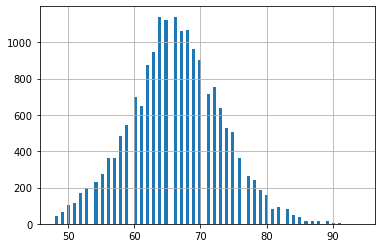

In [11]:
df['overall'].hist(bins = 100)

In [12]:
best_players_per_position=df.iloc[df.groupby(df['player_positions'])['overall'].idxmax()][['player_positions',
                                                                                           'short_name','overall']].sort_values(by=['overall'],
                                                                                                                                ascending=False)

best_players_per_position[['player_position_1','player_position_2', 'player_position_3']] = best_players_per_position.player_positions.str.split(" ",expand=True,)
best_players_per_position['player_position_1'] = best_players_per_position['player_position_1'].str.replace(',', '')
best_players_per_position['player_position_2'] = best_players_per_position['player_position_2'].str.replace(',', '')


best_players_per_position

,player_positions,short_name,overall,player_position_1,player_position_2,player_position_3
0,"RW, CF, ST",L. Messi,94,RW,CF,ST
1,"ST, LW",Cristiano Ronaldo,93,ST,LW,None
2,"LW, CAM",Neymar Jr,92,LW,CAM,None
3,GK,J. Oblak,91,GK,None,None
4,"LW, CF",E. Hazard,91,LW,CF,None
5,"CAM, CM",K. De Bruyne,91,CAM,CM,None
8,CM,L. Modrić,90,CM,None,None
9,"RW, ST",M. Salah,90,RW,ST,None
7,CB,V. van Dijk,90,CB,None,None
15,"CDM, CM",N. Kanté,89,CDM,CM,None


In [13]:
pp1=pd.DataFrame(df['player_position_1'].value_counts().sort_index())
pp2=pd.DataFrame(df['player_position_2'].value_counts().sort_index())
pp3=pd.DataFrame(df['player_position_3'].value_counts().sort_index())
print(len(pp1), len(pp2), len(pp3))

15 14 14


In [14]:
pp1['player_position_2']=pp2['player_position_2']
pp1['player_position_3']=pp3['player_position_3']
pp1

,player_position_1,player_position_2,player_position_3
CAM,1146,737.0,307.0
CB,3162,456.0,118.0
CDM,1424,1132.0,172.0
CF,113,189.0,78.0
CM,2193,1404.0,232.0
GK,2036,NaN,NaN
LB,1303,574.0,135.0
LM,1049,1015.0,345.0
LW,378,439.0,164.0
LWB,90,182.0,43.0


In [15]:
club_avg_overall=df.groupby(["club"])["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(10) # sth wrong, national teams are counted as clubs

,club,overall
226,FC Bayern München,81.304348
505,Real Madrid,80.121212
350,Juventus,80.060606
650,Uruguay,78.608696
224,FC Barcelona,78.363636
407,Mexico,78.000000
426,Netherlands,78.000000
166,Colombia,78.000000
77,Bayer 04 Leverkusen,77.280000
141,Chelsea,77.060606


## 2.-Preparación-de-los-datos

**Retiramos jugadores con bajo Desempeño global ("Overall"), reducimos el tamaño de la base**

**y consideramos Variables de desempeño por habilidad (skills_ratings)**

In [16]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [17]:
df.rename(columns={'attacking_crossing': 'Att_Crossing', 'attacking_finishing': 'Att_Finishing',
                   'attacking_heading_accuracy': 'Att_HeadingAccuracy', 'attacking_short_passing': 'Att_shortPassing',
                   'attacking_volleys': 'Att_Volleys', 'skill_dribbling':  'Sk_dribbling', 'skill_curve': 'Sk_Curve', 
                   'skill_fk_accuracy': 'Sk_FKAccuracy', 'skill_long_passing': 'Sk_LongPassing',
                   'skill_ball_control': 'Sk_BallControl', 'movement_acceleration':  'Mov_Acceleration',
                   'movement_sprint_speed': 'Mov_SprintSpeed',
                   'movement_agility': 'Mov_Agility','movement_reactions': 'Mov_Reactions',
                   'movement_balance': 'Mov_Balance','power_shot_power': 'power_ShotPower',
                   'power_jumping': 'Power_Jumping', 'power_stamina': 'Power_Stamina',
                   'power_strength': 'Power_Strength', 'power_long_shots': 'power_LongShots', 
                   'mentality_aggression': 'Ment_aggression', 'mentality_interceptions': 'Ment_Interceptions',
                   'mentality_positioning': 'Ment_Positioning','mentality_vision': 'Ment_Vision',
                   'mentality_penalties': 'Ment_Penalties', 'mentality_composure': 'Ment_Composure',
                   'defending_marking': 'Def_Marking','defending_Standing_Tackle':'Def_Standing_Tackle',
                   'defending_sliding_tackle':'Def_Sliding_Tackle',
                  'goalkeeping_diving': 'GKDiving', 'goalkeeping_handling': 'GKHandling',
                  'goalkeepingKicking': 'GK_kicking', 'goalkeeping_positioning':'GKPsitioning',
                  'goalkeeping_reflexes': 'GKReflexes'}, inplace=True)

In [18]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'Att_Crossing',
 'Att_Finishing',
 'Att_HeadingAccuracy',
 'Att_shortPassing',
 'Att_Volleys',
 'Sk_dribbling',
 'Sk_Curve',
 'Sk_FKAccuracy',
 'Sk_LongPassing',
 'Sk_BallControl',
 'Mov_Acceleration',
 'Mov_SprintSpeed',
 'Mov_Agility',
 'Mov_Reactions',
 'Mov_Balance',
 'power_ShotPower',
 'Power_Jumping',
 'Power

In [19]:
n=10000 #cantidad de jugadores a considerar

df_n=df.loc[:n] #se reduce la base a los n primeros jugadores

df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['Att_Crossing', 'Att_Finishing', 'Att_HeadingAccuracy', 'Att_ShortPassing',
                  'Att_Volleys', 'Sk_Dribbling', 'Sk_Curve', 'Sk_FKAccuracy', 'Sk_LongPassing',
                  'Sk_BallControl', 'Mov_Acceleration', 'Mov_SprintSpeed', 'Mov_Agility', 'Mov_Reactions',
                  'Mov_Balance', 'Power_ShotPower', 'Power_Jumping', 'Power_Stamina',
                  'Power_Strength', 'Power_LongShots',
                  'Ment_Aggression', 'Ment_Interceptions', 'Ment_Positioning',
                  'Ment_Vision', 'Ment_Penalties', 'Ment_Composure',
                  'Def_Marking', 'Def_StandingTackle', 'Def_SlidingTackle',
                  'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

  
# Gk: goalkeeping, Def: Defense, Mov:Movement, Sk: Skill, Attacking: Att

34 variables numéricas de desempeño según habilidad


In [20]:
df_n

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,Att_Crossing,Att_Finishing,Att_HeadingAccuracy,Att_shortPassing,Att_Volleys,Sk_dribbling,...,Mov_Reactions,Mov_Balance,power_ShotPower,Power_Jumping,Power_Stamina,Power_Strength,power_LongShots,Ment_aggression,Ment_Interceptions,Ment_Positioning,Ment_Vision,Ment_Penalties,Ment_Composure,Def_Marking,defending_standing_tackle,Def_Sliding_Tackle,GKDiving,GKHandling,goalkeeping_kicking,GKPsitioning,GKReflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,player_position_1,player_position_2,player_position_3
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,RW,CF,ST
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,ST,LW,None
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,LW,CAM,None
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,None,None
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,...,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,8

**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [21]:
MachineGunDict={'short_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99
    
df_n=df_n.append(MachineGunDict,ignore_index=True)

In [22]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [23]:
df_skills.head(4)

,Att_Crossing,Att_Finishing,Att_HeadingAccuracy,Att_ShortPassing,Att_Volleys,Sk_Dribbling,Sk_Curve,Sk_FKAccuracy,Sk_LongPassing,Sk_BallControl,Mov_Acceleration,Mov_SprintSpeed,Mov_Agility,Mov_Reactions,Mov_Balance,Power_ShotPower,Power_Jumping,Power_Stamina,Power_Strength,Power_LongShots,Ment_Aggression,Ment_Interceptions,Ment_Positioning,Ment_Vision,Ment_Penalties,Ment_Composure,Def_Marking,Def_StandingTackle,Def_SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,88,95,70,NaN,88,NaN,93,94,92,96,91,84,93,95,95,NaN,68,75,68,NaN,NaN,40,94,94,75,96,33,NaN,NaN,6,11,NaN,NaN,8
1,84,94,89,NaN,87,NaN,81,76,77,92,89,91,87,96,71,NaN,95,85,78,NaN,NaN,29,95,82,85,95,28,NaN,NaN,7,11,NaN,NaN,11
2,87,87,62,NaN,87,NaN,88,87,81,95,94,89,96,92,84,NaN,61,81,49,NaN,NaN,36,87,90,90,94,27,NaN,NaN,9,9,NaN,NaN,11
3,13,11,15,NaN,13,NaN,13,14,40,30,43,60,67,88,49,NaN,78,41,78,NaN,NaN,19,11,65,11,68,27,NaN,NaN,87,92,NaN,NaN,89


## 3.-Exploratorio-Visual-para-Clustering

**Visualizamos los datos de a dos variables numéricas**

**Consigna de trabajo en grupo: buscar agrupamiento de datos usando las variables en skill_ratings de a pares**

In [24]:
data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elejimos dos variables, para esto elejimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[22]



graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Graficamos diferenciando los mejores jugadores y alguna característica de interés (Elegir)

Se puede ubicar un jugador con la siguiente linea de comando, por ejemplo, Leo Messi: 

In [25]:
#Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["short_name"]=='L. Messi' 
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro 


bool_crack=df_n["overall"] > 85
bool_elecc=df_n["club"]=='FC Barcelona' 
#bool_elecc=df_n["Position"]=='GK' #arqueros
bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["short_name"]=='MachineGun'

#Elegir dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[6]  #6
skill_2=skills_ratings[25]  #25


palette=['navy','red','#A2D5F2','orange','green','pink']  

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average player',
                         text=df_n.loc[bool_no_crack,'short_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')
n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'short_name'],
                         opacity=0.6,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'short_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**Identifiquemos algunos jugadores por nombre**

In [26]:
print(df_n.loc[0:100,"short_name"])

0                 L. Messi
1        Cristiano Ronaldo
2                Neymar Jr
3                 J. Oblak
4                E. Hazard
5             K. De Bruyne
6            M. ter Stegen
7              V. van Dijk
8                L. Modrić
9                 M. Salah
10               K. Mbappé
11            K. Koulibaly
12                 H. Kane
13                 Alisson
14                  De Gea
15                N. Kanté
16            G. Chiellini
17               S. Agüero
18            Sergio Ramos
19               L. Suárez
20          R. Lewandowski
21         Sergio Busquets
22            A. Griezmann
23               P. Dybala
24                P. Pogba
25                 Ederson
26             R. Sterling
27              C. Eriksen
28             T. Courtois
29                   Piqué
30           S. Handanovič
31                M. Neuer
32               H. Lloris
33             David Silva
34               E. Cavani
35                D. Godín
36                T. Kroos
3

In [27]:
df.drop(['player_positions'], axis=1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,Att_Crossing,Att_Finishing,Att_HeadingAccuracy,Att_shortPassing,Att_Volleys,Sk_dribbling,Sk_Curve,...,Mov_Reactions,Mov_Balance,power_ShotPower,Power_Jumping,Power_Stamina,Power_Strength,power_LongShots,Ment_aggression,Ment_Interceptions,Ment_Positioning,Ment_Vision,Ment_Penalties,Ment_Composure,Def_Marking,defending_standing_tackle,Def_Sliding_Tackle,GKDiving,GKHandling,goalkeeping_kicking,GKPsitioning,GKReflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,player_position_1,player_position_2,player_position_3
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,...,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,RW,CF,ST
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,...,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,ST,LW,None
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,...,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,LW,CAM,None
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,...,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,None,None
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,...,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+

In [28]:
df_skills.dropna().sum()

Att_Crossing           99.0
Att_Finishing          99.0
Att_HeadingAccuracy    99.0
Att_ShortPassing       99.0
Att_Volleys            99.0
Sk_Dribbling           99.0
Sk_Curve               99.0
Sk_FKAccuracy          99.0
Sk_LongPassing         99.0
Sk_BallControl         99.0
Mov_Acceleration       99.0
Mov_SprintSpeed        99.0
Mov_Agility            99.0
Mov_Reactions          99.0
Mov_Balance            99.0
Power_ShotPower        99.0
Power_Jumping          99.0
Power_Stamina          99.0
Power_Strength         99.0
Power_LongShots        99.0
Ment_Aggression        99.0
Ment_Interceptions     99.0
Ment_Positioning       99.0
Ment_Vision            99.0
Ment_Penalties         99.0
Ment_Composure         99.0
Def_Marking            99.0
Def_StandingTackle     99.0
Def_SlidingTackle      99.0
GKDiving               99.0
GKHandling             99.0
GKKicking              99.0
GKPositioning          99.0
GKReflexes             99.0
dtype: float64

In [38]:
df_skills.fillna(df_skills.mean(), inplace=True)

In [39]:
df_skills.describe()

,Att_Crossing,Att_Finishing,Att_HeadingAccuracy,Att_ShortPassing,Att_Volleys,Sk_Dribbling,Sk_Curve,Sk_FKAccuracy,Sk_LongPassing,Sk_BallControl,Mov_Acceleration,Mov_SprintSpeed,Mov_Agility,Mov_Reactions,Mov_Balance,Power_ShotPower,Power_Jumping,Power_Stamina,Power_Strength,Power_LongShots,Ment_Aggression,Ment_Interceptions,Ment_Positioning,Ment_Vision,Ment_Penalties,Ment_Composure,Def_Marking,Def_StandingTackle,Def_SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000,4757.000000
mean,58.262771,54.057179,59.449022,0.020811,51.823839,0.020811,57.134959,51.144839,61.889847,67.685306,67.452596,67.633172,67.712214,71.824679,65.586294,0.020811,68.633593,69.149674,69.867774,0.020811,0.020811,54.128232,58.877234,62.899727,55.392684,69.299138,53.779062,0.020811,0.020811,16.657347,16.443347,0.020811,0.020811,16.770654
std,19.057687,20.483703,18.241367,1.435386,19.371476,1.435386,19.546689,19.273338,14.419714,16.130121,14.561249,14.222689,14.253701,5.584465,14.534318,1.435386,11.849742,14.882321,11.546919,1.435386,1.435386,22.016307,20.533539,13.361799,16.532943,8.903975,21.563590,1.435386,1.435386,19.244976,18.344544,1.435386,1.435386,19.649723
min,6.000000,5.000000,7.000000,0.000000,5.000000,0.000000,6.000000,4.000000,9.000000,5.000000,15.000000,16.000000,14.000000,54.000000,20.000000,0.000000,29.000000,13.000000,26.000000,0.000000,0.000000,7.000000,3.000000,10.000000,9.000000,17.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,49.000000,40.000000,52.000000,0.000000,38.000000,0.000000,46.000000,37.000000,57.000000,66.000000,59.000000,60.000000,60.000000,68.000000,57.000000,0.000000,62.000000,65.000000,63.000000,0.000000,0.000000,33.000000,50.000000,56.000000,45.000000,65.000000,35.000000,0.000000,0.000000,8.000000,8.000000,0.000000,0.000000,8.000000
50%,65.000000,60.000000,64.000000,0.000000,56.000000,0.000000,63.000000,54.000000,65.000000,72.000000,69.000000,70.000000,70.000000,72.000000,68.000000,0.000000,70.000000,72.000000,71.000000,0.000000,0.000000,64.000000,67.000000,66.000000,59.000000,70.000000,62.000000,0.000000,0.000000,11.000000,11.000000,0.000000,0.000000,11.000000
75%,72.000000,70.000000,72.000000,0.000000,67.000000,0.000000,72.000000,67.000000,72.000000,76.000000,78.000000,77.000000,77.000000,75.000000,76.000000,0.000000,77.000000,78.000000,78.000000,0.000000,0.000000,73.000000,73.000000,73.000000,68.000000,75.000000,72.000000,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,14.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [43]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  8896451.659764053


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

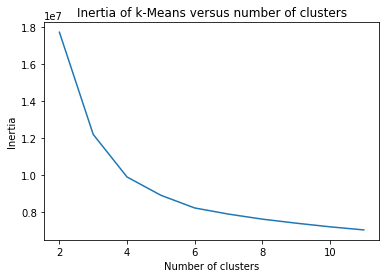

In [52]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(df_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [56]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[22]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [58]:
df_clusters=df_n.copy()
df_clusters['kmeans'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


In [60]:
df_clusters['kmeans']

0       1
1       1
2       1
3       2
4       1
       ..
4752    4
4753    3
4754    3
4755    0
4756    3
Name: kmeans, Length: 4757, dtype: int32

In [63]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

ms = MeanShift(bandwidth=2, bin_seeding=True)

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters

Numero estimado de clusters para Mean Shift : 12


In [66]:
data=[]
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86


#Elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[2]
skill_2=skills_ratings[22]


MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

In [67]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  12 clusters, según los hiperparámetros elegidos
